### **Customer Lifetime Value**

[Sumber Data CLV](https://drive.google.com/file/d/1pYhQb2WcbwLAaMF4FPIEJSM34O-1A4v8/view?usp=drive_link)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Customer Lifetime Value (CLV) adalah sebuah ukuran yang menggambarkan seberapa "penting" seorang pelanggan bagi perusahaan. Pengertian "penting" dalam konteks ini adalah seberapa besar keuntungan/profit (value) yang dapat diperoleh perusahaan dalam menjalin hubungan bisnis dengan pelanggan tersebut secara keseluruhan (lifetime).

Oleh karena itu, CLV merupakan suatu ukuran yang penting bagi perusahaan, termasuk perusahaan asuransi, untuk mengetahui kriteria pelanggan seperti apa yang dapat memberikan keuntungan terbesar bagi perusahaan. Dengan diketahuinya CLV, perusahaan asuransi dapat menyusun strategi marketing ke pelanggan secara akurat, mengetahui pelanggan yang perlu diprioritaskan, memprediksi arus kas di masa depan dan sebagainya, dengan tujuan untuk mendapatkan profit/keuntungan semaksimal mungkin.

**Problem Statement**

Tantangan yang dihadapi perusahaan adalah rumitnya menghitung nilai CLV dan mengimplementasikan informasi CLV secara akurat dan menyeluruh. Berikut adalah rumus umum dalam menghitung CLV:

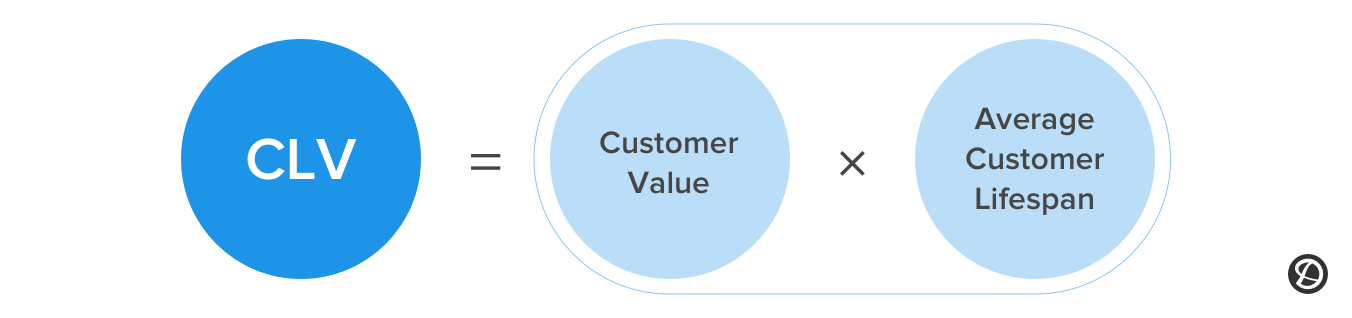

Dari rumus tersebut, dapat diketahui bahwa untuk menghitung CLV dibutuhkan 2 informasi yaitu Customer Value (rata-rata nilai/value pelanggan) dan Average Customer Lifespan (rata-rata lama hubungan bisnis pelanggan dengan perusahaan). Kedua informasi tersebut dapat dibilang sangat terbatas dan tidak menggambarkan karakteristik pelanggan secara mendetail, sehingga walaupun didapatkan nilai CLV, informasi tersebut tidak dapat digunakan secara luas. Selain itu, dibutuhkan juga waktu yang lebih lama untuk menghitung nilai CLV secara manual dalam lingkup perusahaan yang memiliki berbagai macam pelanggan dengan karakteristik yang berbeda-beda. Oleh karena itu, **Perusahaan memerlukan suatu metode yang cepat dan akurat untuk mengetahui dan memprediksi nilai CLV pelanggan berdasarkan karakteristik/fitur yang tersedia.**

**Goals**

Berdasarkan permasalahan tersebut, perusahaan memerlukan sebuah "tool" yang mampu memprediksi nilai CLV secara cepat dan akurat dari berbagai karakteristik pelanggan seperti tingkat penghasilan, status pekerjaan, status perkawinan, tingkat pendidikan, dan sebagainya.

Dari penggunaan "tool" tersebut, proses planning dan implementation (yang terkait dengan rencana marketing ke pelanggan yang tepat) tentunya dapat berjalan dengan lebih cepat dan efektif yang dapat meningkatkan keuntungan perusahaan.


**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari karakteristik pelanggan yang ada terhadap nilai CLV yang dihasilkan.

Selanjutnya, kita akan membangun suatu model Machine Learning regresi yang akan membantu perusahaan asuransi untuk dapat menyediakan 'tool' prediksi nilai CLV yang tentunya akan sangat membantu perusahaan dalam mempercepat proses planning dan implementasi yang akurat terkait pelanggan (baik dalam hal marketing, menjalin hubungan, prioritas, dsb), sehingga keuntungan yang diperoleh perusahaan dapat maksimal.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi nilai CLV.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **Data Understanding**

Dataset merupakan karakteristik pelanggan beserta nilai CLV-nya masing-masing.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Jenis Kendaraan |
| Coverage | Object | Tipe Coverage/Asuransi |
| Renew Offer Type | Object | Tipe Renew Offer |
| EmploymentStatus | Object | Status Pekerjaan |
| Marital Status | Object | Status Perkawinan |
| Education | Object | Tingkat Pendidikan |
| Number of Policies | Integer | Banyaknya Asuransi yang Dimiliki |
| Monthly Premium Auto | Integer | Biaya Asuransi Tiap Bulan |
| Total Claim Amount | Float | Jumlah Uang yang didapat dari Asuransi |
| Income | Integer | Penghasilan |
| Customer Lifetime Value | Float | CLV |

<br>

In [ ]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.
- Melakukan treatment terhadap data duplikat jika ada. Bisa dengan menghapus semua duplikasi data atau hanya mempertahankan data yang pertama kali muncul dan menghapus data lainnya yang sama.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [ ]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [ ]:
# Menampilkan informasi dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


Dapat diketahui bahwa dataset memiliki 11 kolom dan 5669 baris. Tidak terdapat nilai kosong pada dataset yang ditandakan dengan jumlah baris setiap kolomnya yang berjumlah 5669 baris. Untuk memastikan tidak adanya missing value pada dataset, dapat juga dijalankan code di bawah ini.

In [ ]:
# Memastikan tidak adanya missing value pada setiap kolom dalam dataset
df_model.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [ ]:
# Cek duplikasi pada dataset
df_model.duplicated().value_counts()

False    5051
True      618
dtype: int64

Dapat diketahui bahwa terdapat data duplikat (data yang memiliki nilai identik dengan data lain) pada dataset sebanyak 618 baris.

In [ ]:
# Melihat data duplikat
duplicate = df_model[df_model.duplicated()]
duplicate

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


In [ ]:
# Melihat sampel data duplikat (yang memiliki CLV = 9048.983447)
df_model[df_model['Customer Lifetime Value'] == 9048.983447]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
182,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.2,0.0,9048.983447
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.2,0.0,9048.983447
2105,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.2,0.0,9048.983447
5026,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.2,0.0,9048.983447


In [ ]:
# Melihat sampel data duplikat (yang memiliki Income = 24910.0)
df_model[df_model["Income"] == 24910.0]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
12,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
2468,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
5125,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633


Dapat dilihat pada sampel data duplikat bahwa duplikasi data terjadi lebih dari satu kali. Untuk kolom bertipe kategorik, kemiripan data masih wajar saja terjadi karena data kategorik hanya terdiri dari beberapa pilihan yang kebetulan sama. Namun, jika kolom numerik (terutama Income dan CLV yang bertipe float) juga memiliki nilai yang sama, hal tersebut tentunya memiliki kemungkinan yang sangat kecil untuk terjadi secara kebetulan.

Data duplikat pada dataset sebaiknya dihapus karena berpotensi menimbulkan bias pada model machine learning yang dihasilkan nantinya. Oleh karena itu, akan dilakukan drop_duplicates() guna menghapus semua kolom yang memiliki duplikat.

In [ ]:
# Hapus semua data duplikat
df_model = df_model.drop_duplicates()
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5051 non-null   object 
 1   Coverage                 5051 non-null   object 
 2   Renew Offer Type         5051 non-null   object 
 3   EmploymentStatus         5051 non-null   object 
 4   Marital Status           5051 non-null   object 
 5   Education                5051 non-null   object 
 6   Number of Policies       5051 non-null   float64
 7   Monthly Premium Auto     5051 non-null   float64
 8   Total Claim Amount       5051 non-null   float64
 9   Income                   5051 non-null   float64
 10  Customer Lifetime Value  5051 non-null   float64
dtypes: float64(5), object(6)
memory usage: 473.5+ KB


In [ ]:
df_model.duplicated().value_counts()

False    5051
dtype: int64

Dapat dilihat bahwa keseluruhan data duplikat (yang berjumlah 618 baris) sudah berhasil dihapus, menyisakan 5051 baris data pada semua kolom.

In [ ]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(3).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[SUV, Sports Car, Two-Door Car]"
1,Coverage,object,0,0.0,3,"[Premium, Basic, Extended]"
2,Renew Offer Type,object,0,0.0,4,"[Offer3, Offer4, Offer1]"
3,EmploymentStatus,object,0,0.0,5,"[Disabled, Medical Leave, Retired]"
4,Marital Status,object,0,0.0,3,"[Married, Single, Divorced]"
5,Education,object,0,0.0,5,"[Doctor, Bachelor, Master]"
6,Number of Policies,float64,0,0.0,9,"[7.0, 9.0, 2.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[130.0, 151.0, 65.0]"
8,Total Claim Amount,float64,0,0.0,3274,"[145.990089, 80.73124, 82.733588]"
9,Income,float64,0,0.0,3625,"[44329.0, 23815.0, 41692.0]"


**Drop Columns**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.
- Jika ditinjau berdasar domain knowledge, semua kolom pada data sudah merupakan karakteristik dari pelanggan asuransi kendaraan yang berkemungkinan dapat mempengaruhi nilai CLV.

Oleh karena itu, tidak perlu dilakukannya drop column.

**Missing Value**

In [ ]:
# Cek nilai missing value
df_model.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

Dataset sudah tidak memiliki missing value.

In [ ]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


Dari statistik deskriptif kolom-kolom numerik tersebut, dapat dilihat bahwa terdapat nilai 0 pada Income. Hal tersebut bukan menandakan tidak adanya data, tetapi menandakan bahwa pelanggan tidak memiliki sumber penghasilan. Hal tersebut berkaitan dengan kolom EmploymentStatus, yaitu jika EmploymentStatus = Unemployed (tidak bekerja) maka Income = 0. Hal tersebut tentunya masuk akal karena orang yang tidak bekerja tentunya tidak akan memiliki penghasilan.

In [ ]:
# Cek Income yang bernilai 0
df_model[df_model['Income'] == 0][["EmploymentStatus", "Income"]].head()

,EmploymentStatus,Income
16,Unemployed,0.0
17,Unemployed,0.0
21,Unemployed,0.0
24,Unemployed,0.0
26,Unemployed,0.0


In [ ]:
df_model[df_model['Income'] == 0][["EmploymentStatus", "Income"]].value_counts()

EmploymentStatus  Income
Unemployed        0.0       1332
dtype: int64

In [ ]:
# Cek deskriptif statistik fitur kategorikal
df_model.describe(include = [np.object])

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5051,5051,5051,5051,5051,5051
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2565,3100,2019,3187,2986,1529


Dari statistik deskriptif kolom kategorikal tersebut, dapat diketahui nilai yang paling sering muncul pada setiap kolom beserta jumlah kemunculannya.

**Data Correlation**

In [ ]:
from scipy.stats import normaltest

In [ ]:
# Uji kenormalan kolom Number of Policies
stats, pval = normaltest(df_model['Number of Policies'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [ ]:
# Uji kenormalan kolom Monthly Premium Auto
stats, pval = normaltest(df_model['Monthly Premium Auto'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [ ]:
# Uji kenormalan kolom Total Claim Amount
stats, pval = normaltest(df_model['Total Claim Amount'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [ ]:
# Uji kenormalan kolom Income
stats, pval = normaltest(df_model['Income'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [ ]:
# Uji kenormalan kolom Customer Lifetime Value
stats, pval = normaltest(df_model['Customer Lifetime Value'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


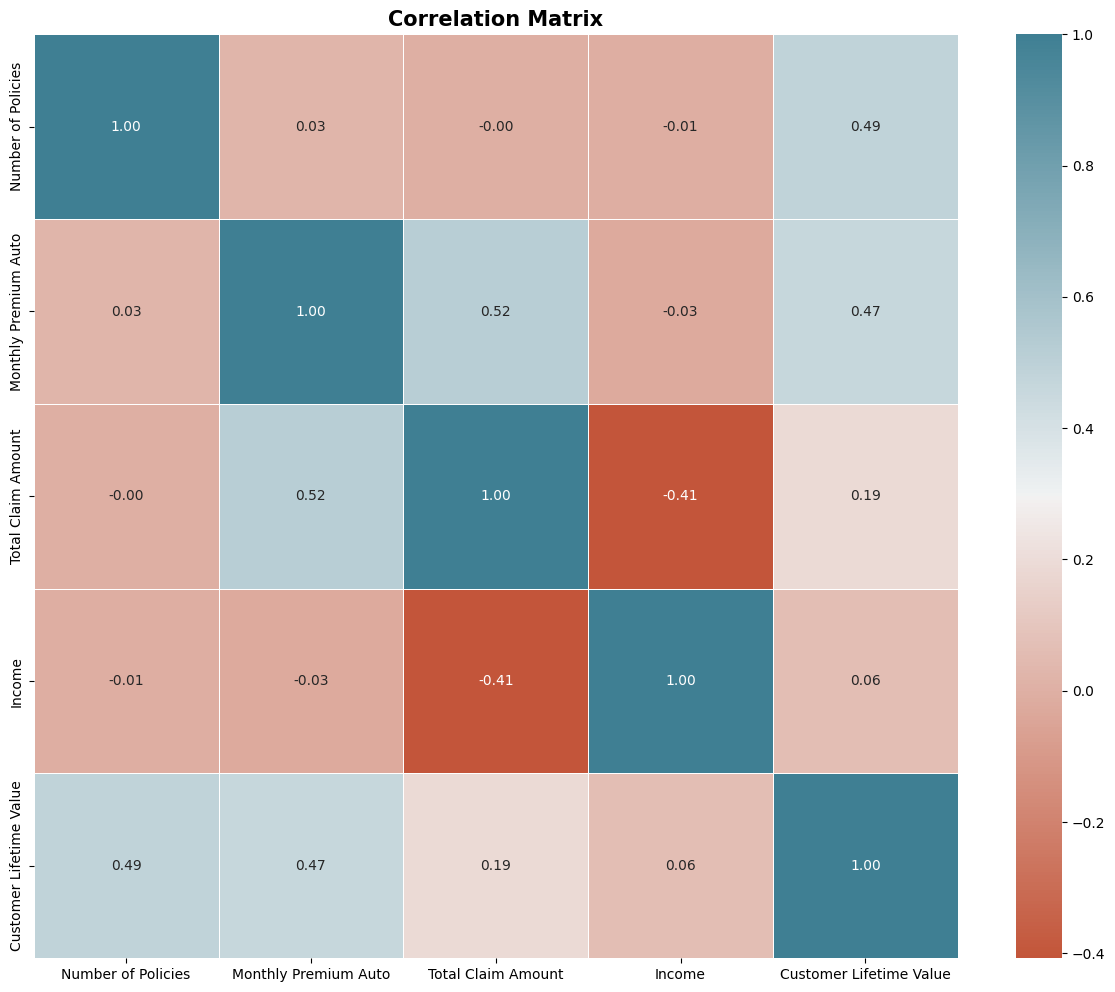

In [ ]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='spearman') # spearman digunakan karena data tidak berdistribusi normal
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur CLV. Korelasi paling tinggi dimiliki oleh fitur "Number of Policies" dan 'Monthly Premium Auto', dimana korelasi keduanya adalah korelasi sedang positif. Hal tersebut menunjukkan bahwa semakin besar jumlah asuransi (Number of Policies) dan biaya bulanan asuransi (Monthly Premium Auto) yang dibayar oleh pelanggan, akan semakin besar pula nilai CLV dari pelanggan tersebut.

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

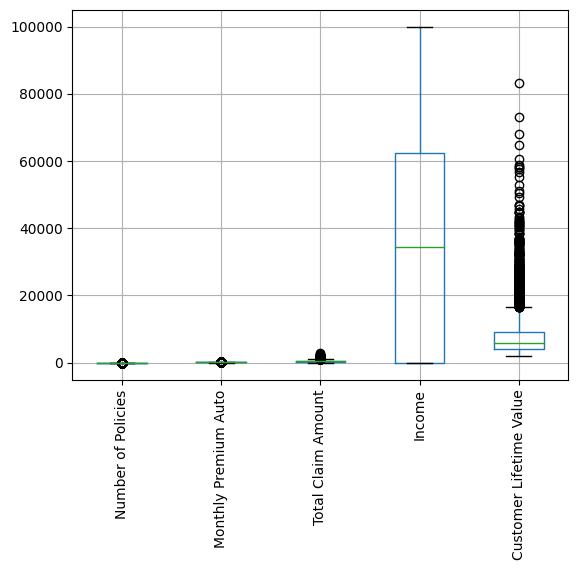

In [ ]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Terlihat banyak sekali outliers pada beberapa fitur, kecuali pada kolom Income yang terlihat tidak memiliki data outlier. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas pada rentang nilai tertentu saja. Jika model Machine Learning menerima input di luar rentang tersebut, maka output yang diperoleh akan kurang akurat.

In [ ]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [ ]:
# Outliers pada fitur Number of Policies
find_anomalies(df_model['Number of Policies'])

IQR: 3.0
limit_bawah: -3.5
limit_atas: 8.5


In [ ]:
# Outliers pada fitur Monthly Premium Auto
find_anomalies(df_model['Monthly Premium Auto'])

IQR: 41.0
limit_bawah: 6.5
limit_atas: 170.5


In [ ]:
# Outliers pada fitur Total Claim Amount
find_anomalies(df_model['Total Claim Amount'])

IQR: 296.34681750000004
limit_bawah: -192.74392225000005
limit_atas: 992.6433477500001


In [ ]:
# Outliers pada fitur Income
find_anomalies(df_model['Income'])

IQR: 62471.5
limit_bawah: -93707.25
limit_atas: 156178.75


In [ ]:
# Outliers pada fitur Customer Lifetime Value
find_anomalies(df_model['Customer Lifetime Value'])

IQR: 5064.1236284999995
limit_bawah: -3631.744438749999
limit_atas: 16624.75007525


Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

**Number of Policies**

In [ ]:
# Cek deskriptif statistik kolom price
df_model['Number of Policies'].describe()

count    5051.000000
mean        2.992081
std         2.386500
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Number of Policies, dtype: float64

In [ ]:
# Cek Number of Policies > 8.5 (Batas bawah tidak perlu diperhitungkan karena bernilai negatif)
df_model[df_model['Number of Policies'] > 8.5].count()['Number of Policies']

228

Dapat dilihat bahwa lebih dari 75% data pada kolom Number of Policies sudah bernilai kurang dari batas atas IQR (8.5). Hanya 228 data saja yang memiliki nilai Number of Policies di atas batas atas IQR. Data-data yang melebihi batas atas IQR tidak perlu disertakan ke dalam pemodelan, sehingga akan menjadi salah satu limitasi model yaitu Number of Policies < 8.5


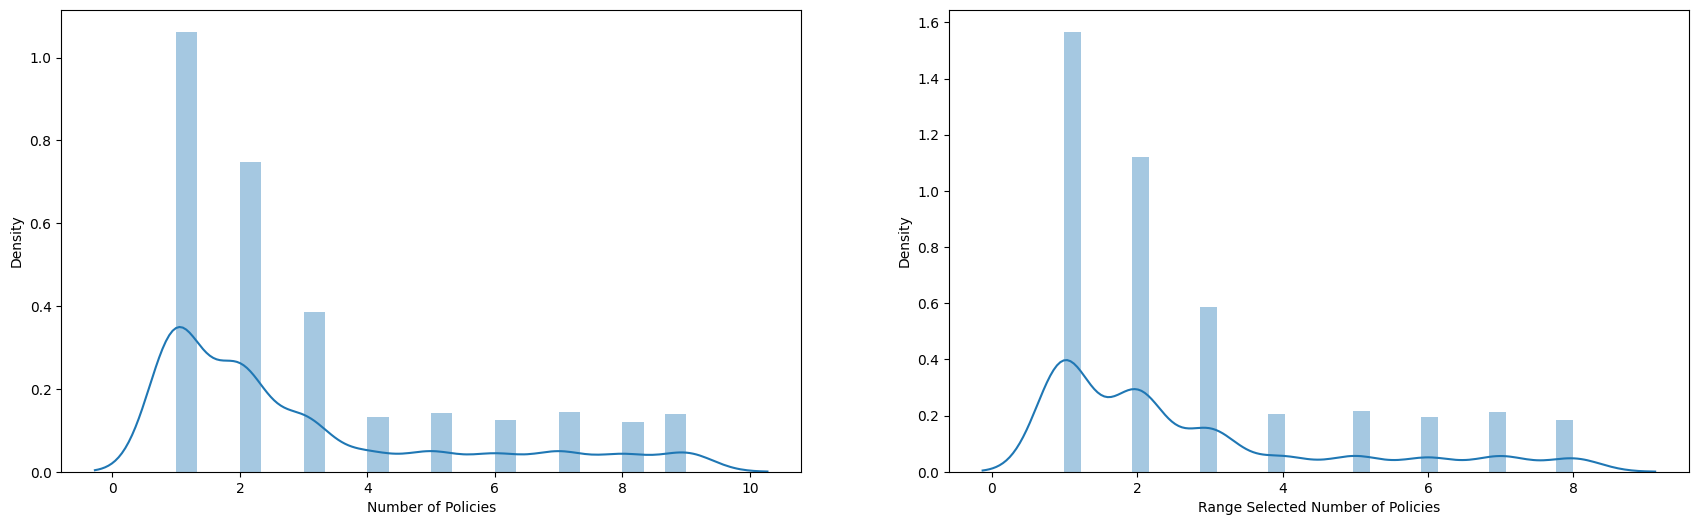

In [ ]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Number of Policies'] <= 8.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Number of Policies'], ax=axes[0])
sns.distplot(df_model['Number of Policies'], ax=axes[1])
axes[0].set_xlabel('Number of Policies')
axes[1].set_xlabel('Range Selected Number of Policies');

In [ ]:
# Cek deskriptif statistik kolom 'Number of Policies' setelah filtering
df_model['Number of Policies'].describe()

count    4823.000000
mean        2.708066
std         2.043845
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: Number of Policies, dtype: float64

**Monthly Premium Auto**

In [ ]:
# Cek deskriptif statistik kolom Monthly Premium Auto
df_model['Monthly Premium Auto'].describe()

count    4823.000000
mean       92.885548
std        34.243174
min        61.000000
25%        68.000000
50%        82.000000
75%       109.000000
max       297.000000
Name: Monthly Premium Auto, dtype: float64

In [ ]:
# Cek jumlah nilai Monthly Premium Auto > 170.5 (batas bawah tidak diperhitungkan karena nilai minimal sudah di atas batas bawah)
df_model[df_model['Monthly Premium Auto'] > 170.5].count()['Monthly Premium Auto']

239

Dapat dilihat bahwa lebih dari 75% data pada kolom Monthly Premium Auto sudah berada di bawah batas atas IQR. Hanya 239 baris data yang melebihi batas atas IQR. Ke-239 data tersebut juga tidak akan diikutsertakan ke dalam model dan menjadi salah satu limitasi model Machine Learning nantinya, yaitu Monthly Premium Auto <= 170.5

In [ ]:
# Memilih data dengan nilai Monthly Premium Auto tidak lebih dari 170.5
df_model = df_model[(df_model['Monthly Premium Auto'] <= 170.5)]

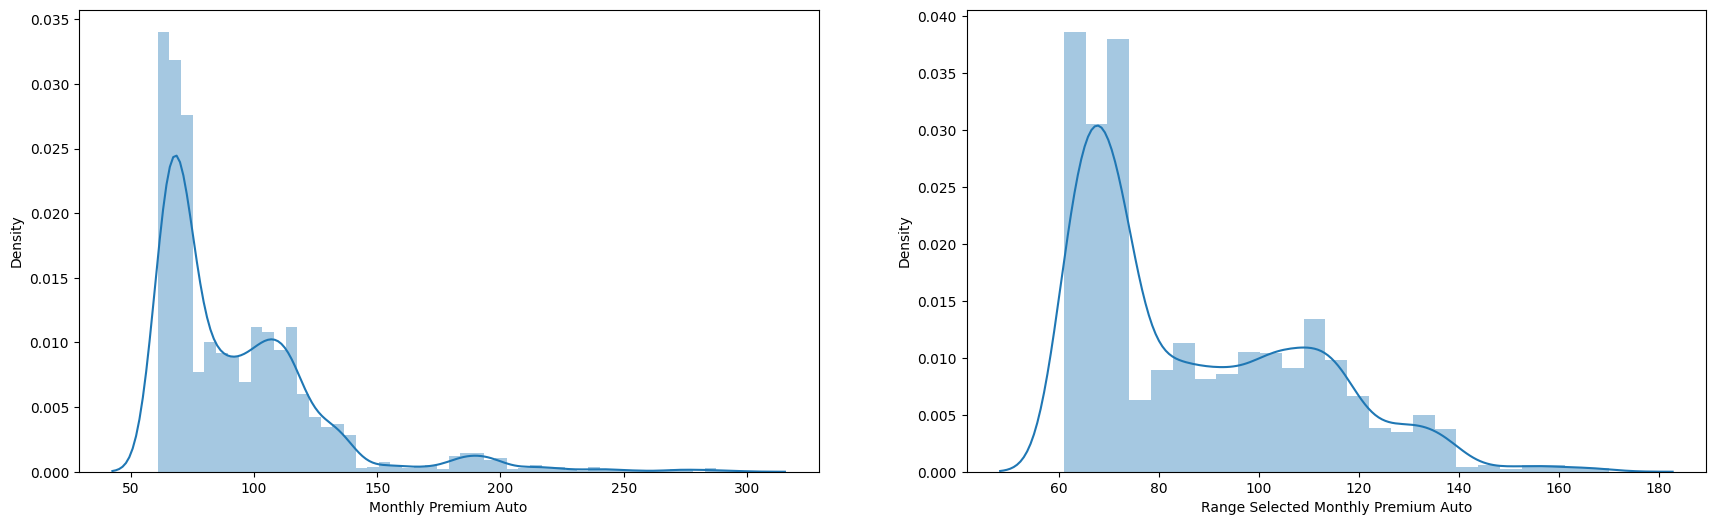

In [ ]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Monthly Premium Auto'], ax=axes[0])
sns.distplot(df_model['Monthly Premium Auto'], ax=axes[1])
axes[0].set_xlabel('Monthly Premium Auto')
axes[1].set_xlabel('Range Selected Monthly Premium Auto');

In [ ]:
# Statistik deskriptif kolom Monthly Premium Auto setelah filtering
df_model["Monthly Premium Auto"].describe()

count    4584.000000
mean       87.118019
std        22.854849
min        61.000000
25%        68.000000
50%        79.000000
75%       105.000000
max       170.000000
Name: Monthly Premium Auto, dtype: float64

**Total Claim Amount**

In [ ]:
df_model['Total Claim Amount'].describe()

count    4584.000000
mean      398.587786
std       238.939351
min         0.423310
25%       245.148253
50%       359.770116
75%       528.000000
max      1516.383753
Name: Total Claim Amount, dtype: float64

In [ ]:
# Cek jumlah Total Claim Amount yang lebih dari batas atas (batas bawah tidak diperhitungkan karena bernilai negatif)
len(df_model[df_model['Total Claim Amount'] > 992.6433477500001])

97

Dapat dilihat bahwa lebih dari 75% data pada kolom Total Claim Amount sudah berada di bawah batas atas. Hanya 97 baris data yang memiliki nilai Total Claim Amount di atas batas atas, dan 97 data tersebut tidak akan digunakan dalam pemodelan. Hal tersebut menambah limitasi model yaitu Total Claim Amount <= 992.6433477500001

In [ ]:
# Menerapkan limitasi data berdasar kolom 'Total Claim Amount'
df_model = df_model[(df_model['Total Claim Amount'] <= 992.6433477500001)]

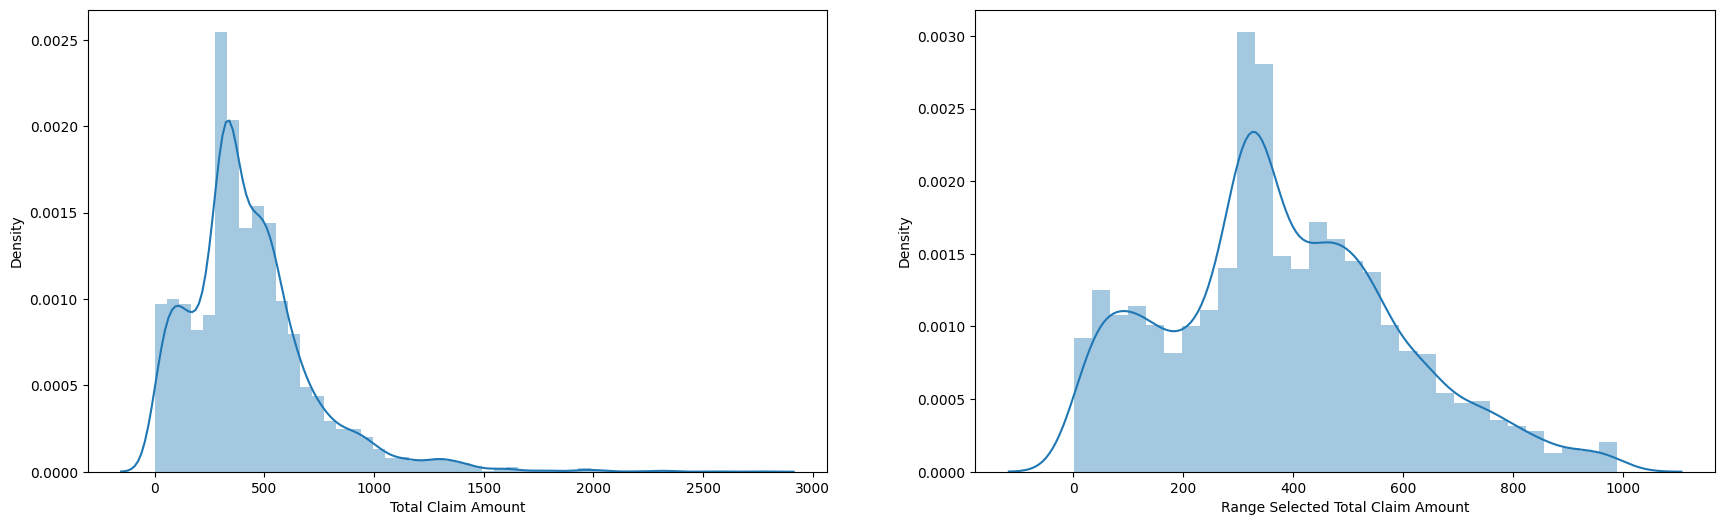

In [ ]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Total Claim Amount'], ax=axes[0])
sns.distplot(df_model['Total Claim Amount'], ax=axes[1])
axes[0].set_xlabel('Total Claim Amount')
axes[1].set_xlabel('Range Selected Total Claim Amount');

**Income**

Karena Income tidak memikiki nilai outlier, maka tidak perlu dilakukan filtering

**Customer Lifetime Value**

In [ ]:
# Cek statistik deskriptif Customer Lifetime Value
df_model['Customer Lifetime Value'].describe()

count     4487.000000
mean      7569.245947
std       6257.527190
min       1898.007675
25%       3663.980374
50%       5565.693282
75%       8649.848932
max      57520.501510
Name: Customer Lifetime Value, dtype: float64

In [ ]:
# Cek jumlah data dengan nilai Customer Lifetime Value melebihi batas atas (Batas bawah tidak diperhitungkan karena bernilai negatif)
df_model[df_model['Customer Lifetime Value'] > 16624.75007525].count()['Customer Lifetime Value']

356

Dapat dilihat bahwa lebih dari 75% data pada kolom Customer Lifetime Value sudah berada di bawah batas atas. Hanya 356 baris data yang memiliki nilai Customer Lifetime Value di atas batas atas, yang nantinya tidak akan dimasukkan ke dalam model. Hal ini menambah limitasi model yaitu nilai CLV <= 16624.75007525

In [ ]:
# Menerapkan limitasi data berdasar kolom 'Customer Lifetime Value'
df_model = df_model[(df_model['Customer Lifetime Value'] <= 16624.75007525)]

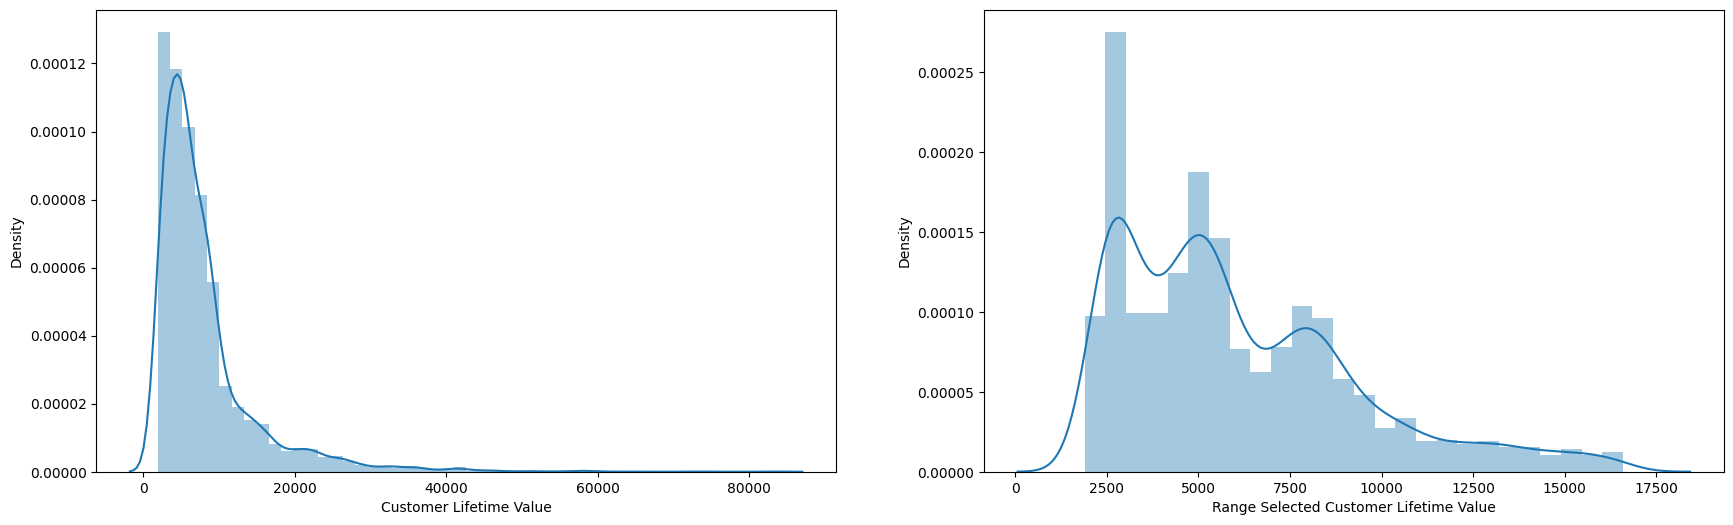

In [ ]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Customer Lifetime Value'], ax=axes[0])
sns.distplot(df_model['Customer Lifetime Value'], ax=axes[1])
axes[0].set_xlabel('Customer Lifetime Value')
axes[1].set_xlabel('Range Selected Customer Lifetime Value');

**Clean Dataset**

In [ ]:
# Cek dataset yang sudah bersih
df_model.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [ ]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4131 entries, 0 to 5666
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4131 non-null   object 
 1   Coverage                 4131 non-null   object 
 2   Renew Offer Type         4131 non-null   object 
 3   EmploymentStatus         4131 non-null   object 
 4   Marital Status           4131 non-null   object 
 5   Education                4131 non-null   object 
 6   Number of Policies       4131 non-null   float64
 7   Monthly Premium Auto     4131 non-null   float64
 8   Total Claim Amount       4131 non-null   float64
 9   Income                   4131 non-null   float64
 10  Customer Lifetime Value  4131 non-null   float64
dtypes: float64(5), object(6)
memory usage: 387.3+ KB


Pada akhirnya, tersisa 4131 baris data yang sudah bersih dan siap digunakan untuk proses pemodelan Machine Learning.

### **Modeling**

In [ ]:
!pip install category_encoders

In [ ]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4131 entries, 0 to 5666
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4131 non-null   object 
 1   Coverage                 4131 non-null   object 
 2   Renew Offer Type         4131 non-null   object 
 3   EmploymentStatus         4131 non-null   object 
 4   Marital Status           4131 non-null   object 
 5   Education                4131 non-null   object 
 6   Number of Policies       4131 non-null   float64
 7   Monthly Premium Auto     4131 non-null   float64
 8   Total Claim Amount       4131 non-null   float64
 9   Income                   4131 non-null   float64
 10  Customer Lifetime Value  4131 non-null   float64
dtypes: float64(5), object(6)
memory usage: 387.3+ KB


In [ ]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status']),
    ('Ordinal', ce.OrdinalEncoder(), ['Education'])
], remainder='passthrough')

**Data Splitting**

In [ ]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['Customer Lifetime Value'], axis=1)
y = df_model['Customer Lifetime Value']

**Train and Test Splitting**

In [ ]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1)

**Choose a Benchmark Model**

In [ ]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-2961.07391984 -3045.22600271 -3013.83621027 -2775.20744711
 -2814.35713034] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2092.18213861 -2112.09906696 -2071.70814515 -1964.22320775
 -1999.25359533] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.32578338 -0.33153926 -0.32935281 -0.33522901 -0.32730709] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2831.38938767 -2963.40636171 -2913.01888947 -2805.20471333
 -2725.85726388] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-1904.24845676 -1974.79776987 -1940.28496014 -1896.0443697
 -1826.53565119] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                     

In [ ]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-2921.940142,107.963264,-2047.893231,56.599530,-0.329842,0.003318
1,KNN Regressor,-2847.775323,83.152906,-1908.382242,49.592301,-0.325730,0.011497
2,DecisionTree Regressor,-1408.147376,117.765412,-495.128444,51.171176,-0.060291,0.004961
3,RandomForest Regressor,-1002.929874,95.694561,-380.608421,38.513415,-0.045087,0.003801
4,XGBoost Regressor,-1004.581819,100.687656,-403.293880,37.971328,-0.051331,0.003295


Dapat dilihat bahwa terdapat nilai negatif pada perhitungan error metric. Tanda negatif hanya menunjukkan bahwa nilai prediksi lebih besar daripada nilai aktualnya, bukan berarti nilai negatif lebih kecil dari nilai positif.

Dari hasil yang didapatkan, terdapat perbedaan yang cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

Dapat disimpulkan bahwa model terbaik berdasarkan ketiga error metric tersebut adalah model Random Forest Regressor, yang memiliki nilai error metric (baik RMSE, MAE, dan MAPE) terendah dibanding model-model yang lain. Posisi kedua ditempati oleh model XGBoost Regressor. Kedua model ini akan dijadikan benchmark untuk prediksi data testing.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [ ]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,1006.750244,463.272586,0.071031
RandomForest,1003.955059,403.606439,0.049720


- Ketika dilakukan prediksi pada test set, performa Random Forest secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari XGBoost.


**Hyperparameter Tuning**

Karena model Random Forest memiliki performa yang sedikit lebih baik dari XGBoost, maka selanjutnya kita akan menggunakan model Random Forest ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model Random Forest dengan harapan dapat meningkatkan performa model.

In [ ]:
# Mengetahui Parameter pada Random Forest
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


Terdapat banyak parameter pada Random Forest. Parameter-parameter utama yang akan dituning antara lain:
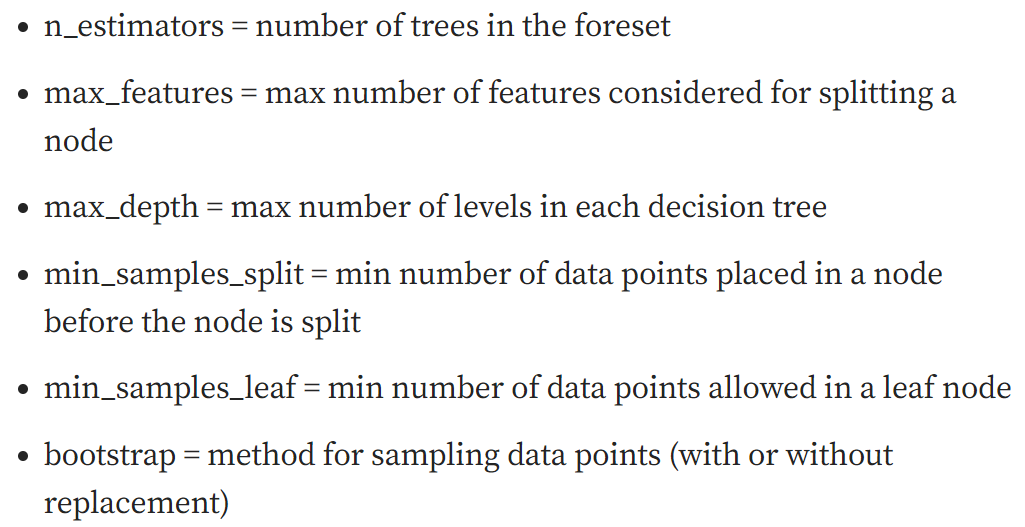

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = list(np.arange(100, 500, 10))
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = list(np.arange(2, 11))
# Minimum number of samples required at each leaf node
min_samples_leaf = list(np.arange(1, 11))
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
hyperparam_space_rf = {'model__n_estimators': n_estimators,
               'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap}
print(hyperparam_space_rf)

{'model__n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490], 'model__max_features': ['auto', 'sqrt'], 'model__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'model__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'model__bootstrap': [True, False]}


In [ ]:
# Benchmark model dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=1)

# Membuat algorithm chains
estimator_rf = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', rf)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf,
    param_distributions = hyperparam_space_rf,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1
)

In [ ]:
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'Coverage',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'EmploymentStatus',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['Education'])])),
                                             ('scaler...
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10],
                                        'model__n_estimators': [100, 110, 120,
                                                                130, 140, 150,
                                                                160, 170, 180,
                                                                190, 200, 210,
                                                                220, 230, 240,
                                                                250, 260, 270,
                                                                280, 290, 300,
                                                                310, 320, 330,
                                                                340, 350, 360,
                                                                370, 380, 390, ...]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [ ]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__bootstrap,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
18,3.602986,0.527118,0.055158,0.002352,490,8,9,auto,50,True,...,27.180867,8,-0.050331,-0.046420,-0.046694,-0.045550,-0.042239,-0.046247,0.002587,8
38,2.146027,0.186439,0.040373,0.002259,320,2,10,auto,None,True,...,26.597767,9,-0.050667,-0.046692,-0.047120,-0.045967,-0.042808,-0.046651,0.002514,9
9,2.884698,0.327779,0.072549,0.055080,380,8,7,auto,50,True,...,27.338027,6,-0.049521,-0.046097,-0.045934,-0.045342,-0.041375,-0.045654,0.002594,6
48,3.070273,0.372226,0.050253,0.001280,420,6,7,auto,20,True,...,27.594377,5,-0.049623,-0.046056,-0.045902,-0.045299,-0.041343,-0.045645,0.002634,5
41,3.699636,0.485718,0.058605,0.004187,470,3,6,auto,30,True,...,28.564038,4,-0.049536,-0.046095,-0.045479,-0.044881,-0.041005,-0.045399,0.002727,4


In [ ]:
# Cek skor dan params terbaik
print('RandomForestRegressor')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

RandomForestRegressor
Best_score: -975.4810058988935
Best_params: {'model__n_estimators': 490, 'model__min_samples_split': 8, 'model__min_samples_leaf': 9, 'model__max_features': 'auto', 'model__max_depth': 50, 'model__bootstrap': True}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model Random Forest Regressor dan hyperparameter terpilih.

In [ ]:
# Model Random Forest Regressor
model = {'Random Forest Regressor': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
Random Forest Regressor,954.90081,396.643039,0.048453


**Performance Comparison**

Perbandingan performa model RandomForestRegressor sebelum dan sesudah dilakukan hyperparameter tuning.

In [ ]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

,RMSE,MAE,MAPE
RandomForest,1003.955059,403.606439,0.04972


In [ ]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
Random Forest Regressor,954.90081,396.643039,0.048453


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 1003.955059, 403.606439, 0.04972
- RMSE, MAE & MAPE setelah tuning: 954.90081, 396.643039, 0.048453

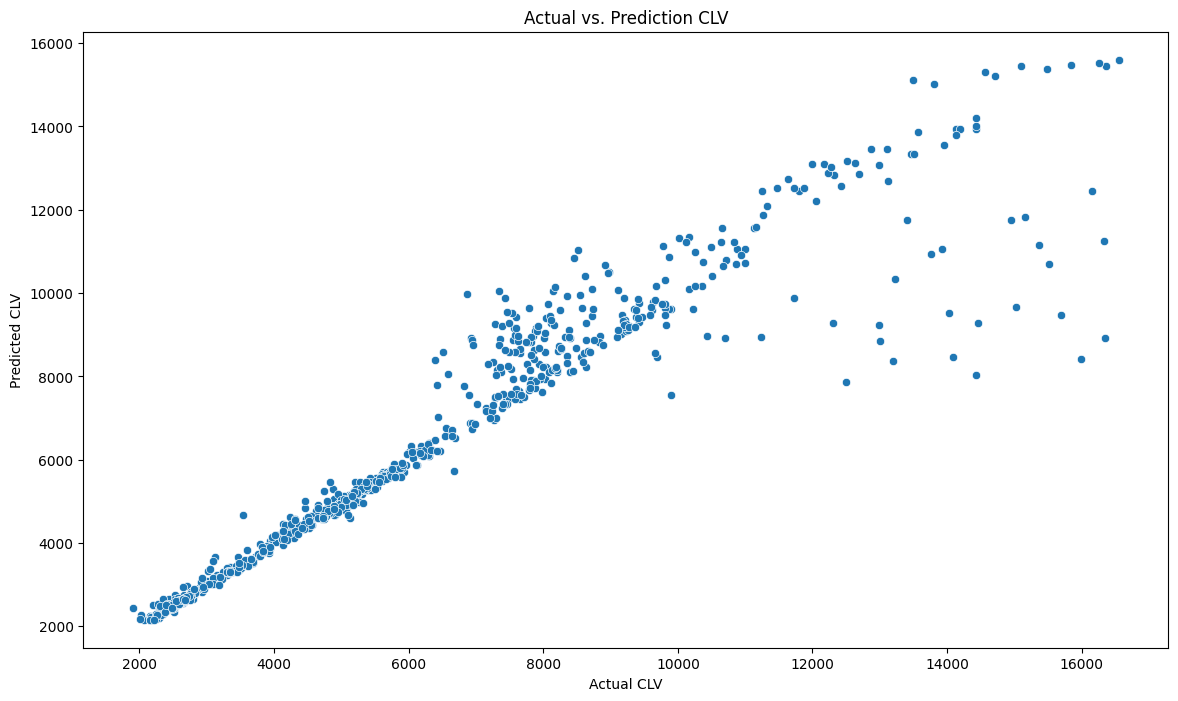

In [ ]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_rf_tuning).set(title='Actual vs. Prediction CLV',
                                               xlabel='Actual CLV',
                                               ylabel='Predicted CLV');

Dari scatterplot di atas, dapat terlihat hubungan antara nilai aktual dan nilai prediksi membentuk garis linear. Hal tersebut menunjukkan bahwa nilai prediksi dan nilai aktual sudah cukup akurat. Nilai MAPE yang rendah (sekitar 4.8%) juga mendukung pernyataan tersebut.

Dapat terlihat bahwa mulai dari titik 10000 ke atas, mulai terjadi penyebaran data yang kurang linear. Dapat disimpulkan bahwa model lebih akurat dalam memprediksi nilai CLV yang kurang dari 10000.

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (CLV), kita dapat mengeceknya melalui function feature_importances_.

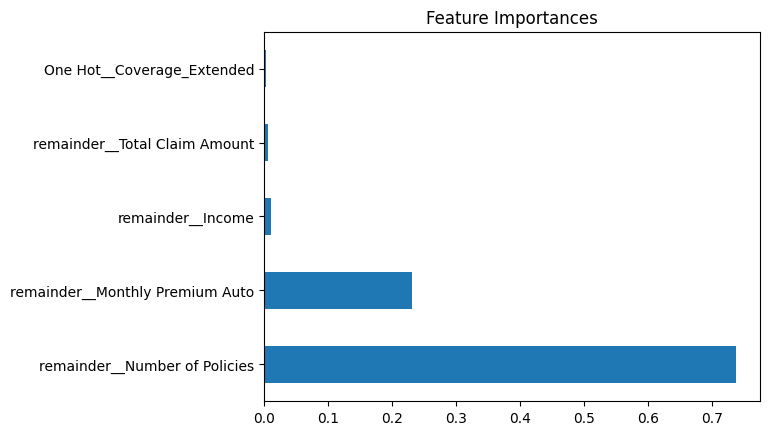

In [ ]:
# Plot feature importances
feature_imp = pd.Series(rf_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

### **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'Number of Policies' dan 'Monthly Premium Auto' menjadi fitur yang paling berpengaruh terhadap 'Customer Lifetime Value'.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning (yaitu sebesar kurang lebih 4.8%), kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan CLV pelanggan asuransi pada rentang nilai (limitasi) seperti yang dilatih terhadap model, maka perkiraan CLV rata-rata akan meleset kurang lebih sebesar 4.8% dari CLV sebenarnya.

 Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena masih terdapat bias pada model bila dilihat dari visualisasi scatterplot di atas, dimana kurang lebih titik di atas nilai 10000 mulai terjadi penyebaran yang kurang linear. Bias yang dihasilkan oleh model ini kemungkinan dikarenakan oleh kurang meratanya nilai pada fitur CLV, dimana fitur CLV didominasi oleh nilai di bawah 10000 pada proses training sehingga prediksi CLV di atas nilai 10000 dapat dikatakan kurang akurat.

 Model ini tentu masih dapat dikembangkan lagi agar dapat menghasilkan prediksi yang lebih baik lagi. Parameter Random Forest lainnya dapat diikutsertakan dalam proses tuning, juga mencoba nilai-nilai parameter lainnya yang berkemungkinan mampu meningkatkan performa model.

### **Recommendations**

1. Sebaiknya memperhatikan keseimbangan nilai-nilai pada setiap fitur dataset sehingga dapat dihasilkan model machine learning yang tidak bias.
<br><br>   
1. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('Customer Lifetime Value') dapat ditambahkan seperti fitur customer cost dan customer lifespan (bagian dari rumus dalam mencari nilai CLV).
<br><br>   
3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model deep learning untuk menemukan pola-pola tersembunyi pada data. Namun, kalau jumlah data dan fiturnya masih sama seperti saat ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan karena deep learning memerlukan jumlah data yang sangat banyak untuk mencapai efektivitas maksimal.
<br><br>   
4. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan model ini kedepannya atau pembuatan model lainnya. Contohnya seperti pengembangan model baru menjadi klasifikasi untuk menentukan apakah pelanggan layak dipertahankan atau tidak berdasarkan beberapa fitur yang salah satunya adalah nilai CLV.


****

#### **Save Model**

In [ ]:
# Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_Airbnb_XGB.sav', 'wb'))

In [ ]:
# Load model
# filename = 'Model_Airbnb_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))